In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
colnames=['time','old_cwnd', 'new_cwnd','RTT','nan','target']

In [3]:
data = pd.read_csv('./network_data.csv', header=None, names=colnames)

In [4]:
data = data.drop('nan', axis=1)

In [6]:
def change(col):
    if col != '0':
        col = col.split('+')[1][:-1]
    return float(col)

data['RTT'] = data['RTT'].apply(change)

In [7]:
# colnames=['old_cwnd', 'new_cwnd','RTT','target']
# for i in colnames:
#     data[i] = data[i].astype('float')

In [8]:
data.drop('old_cwnd', axis=1,inplace=True)

In [9]:
data

,time,new_cwnd,RTT,target
0,1.00419,5360,4.00000,0
1,1.00930,5896,4.12500,0
2,1.01335,6432,4.73438,0
3,1.02167,6968,5.76758,0
4,1.02999,7504,6.67163,0
...,...,...,...,...
1008,9.28432,8861,5.99399,0
1009,9.29264,8893,5.99474,0
1010,9.30096,8925,5.87040,0
1011,9.30928,8957,5.88660,0


In [10]:
from sklearn.model_selection import train_test_split
data.drop('time', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['target'], stratify=data['target'], random_state=12)

In [11]:
X_train

,new_cwnd,RTT
523,13563,5.98828
860,6792,5.89145
136,6750,5.98030
302,7696,5.99313
327,8568,5.99313
...,...,...
744,6792,5.97392
631,5172,5.87355
893,3600,5.95507
349,9268,5.98975


In [12]:
def train(X_train, target, model):
    clf  = model
    clf.fit(X_train, target)
    return clf

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
def metric(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('----------metrics----------')
    print(f'accuracy : {metrics.accuracy_score(y_test, y_pred)}') 
    print(f'bal_acc_score : {metrics.balanced_accuracy_score(y_test, y_pred)}') 
    print(f'precision : {metrics.precision_score(y_test, y_pred)}') 
    print(f'recall : {metrics.recall_score(y_test, y_pred)}') 
    print(f'f1_score : {metrics.f1_score(y_test, y_pred)}') 
    print()
    print(f'confusion matrix')
    print(metrics.confusion_matrix(y_test, y_pred))
    

Index(['new_cwnd', 'RTT'], dtype='object')
linear_model.SGD
----------metrics----------
accuracy : 0.9606299212598425
bal_acc_score : 0.5
precision : 0.0
recall : 0.0
f1_score : 0.0

confusion matrix
[[244   0]
 [ 10   0]]


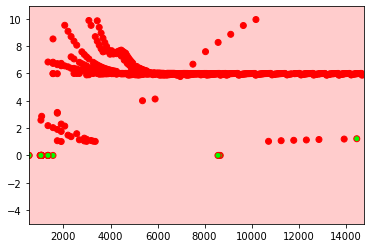

svm.LinearSVC
----------metrics----------
accuracy : 0.9606299212598425
bal_acc_score : 0.5
precision : 0.0
recall : 0.0
f1_score : 0.0

confusion matrix
[[244   0]
 [ 10   0]]


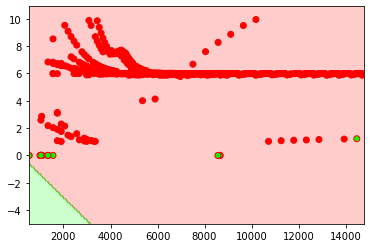

svm.SVC(linear)
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


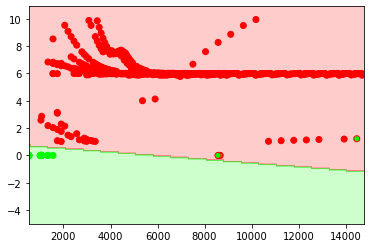

svm.SVC(poly,2)
----------metrics----------
accuracy : 0.9606299212598425
bal_acc_score : 0.5
precision : 0.0
recall : 0.0
f1_score : 0.0

confusion matrix
[[244   0]
 [ 10   0]]


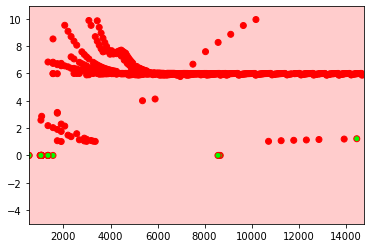

svm.SVC(poly,3)
----------metrics----------
accuracy : 0.9606299212598425
bal_acc_score : 0.5
precision : 0.0
recall : 0.0
f1_score : 0.0

confusion matrix
[[244   0]
 [ 10   0]]


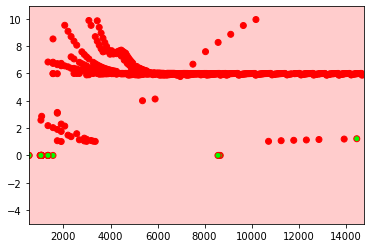

svm.SVC(poly,4)
----------metrics----------
accuracy : 0.9606299212598425
bal_acc_score : 0.5
precision : 0.0
recall : 0.0
f1_score : 0.0

confusion matrix
[[244   0]
 [ 10   0]]


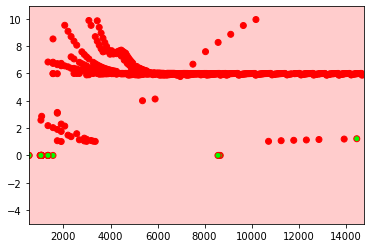

svm.SVC(rbf)
----------metrics----------
accuracy : 0.968503937007874
bal_acc_score : 0.6
precision : 1.0
recall : 0.2
f1_score : 0.33333333333333337

confusion matrix
[[244   0]
 [  8   2]]


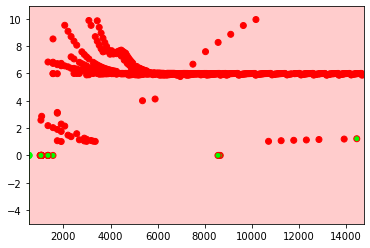

tree.ExtraTree
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


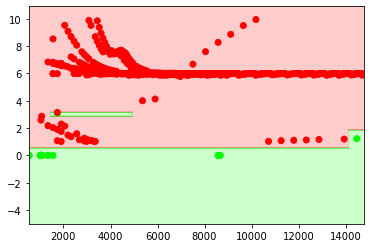

ensemble.RandomForest(10)
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


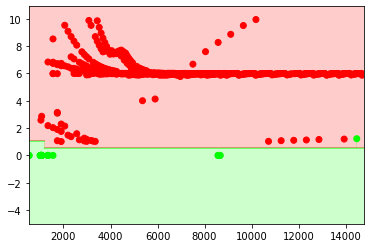

ensemble.RandomForest(100)
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


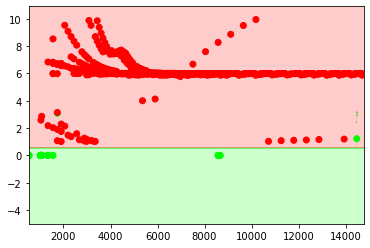

ensemble.ExtraTrees(10)
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


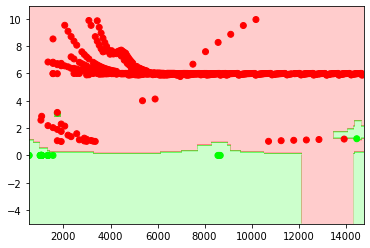

ensemble.ExtraTrees(100)
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


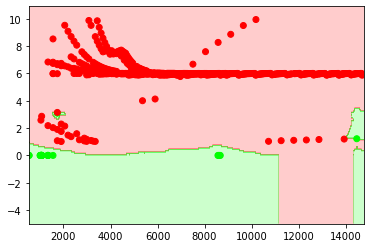

ensemble.AdaBoost(DTree)
----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


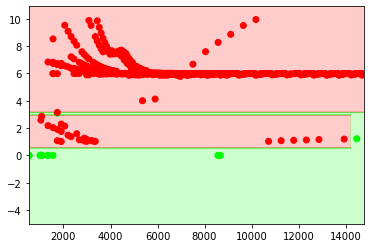

In [15]:
import numpy as np
from sklearn import (datasets, feature_extraction, linear_model, metrics)
from sklearn import svm
from sklearn import (tree, ensemble)
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

x_min, x_max = X_train.iloc[:, 0].min() - 5, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 5, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1), np.arange(y_min, y_max, 0.1))
xy = np.vstack((xx.flatten(), yy.flatten())).T
color = np.array([(1, 0, 0), (0, 1, 0)])
feature_names = X_train.columns
print(feature_names)


models = [
    {'name': 'linear_model.SGD', 'obj': linear_model.SGDClassifier()},    
    {'name': 'svm.LinearSVC', 'obj': svm.LinearSVC()},   
    {'name': 'svm.SVC(linear)', 'obj': svm.SVC(kernel='linear')},
    {'name': 'svm.SVC(poly,2)', 'obj': svm.SVC(kernel='poly', degree=2)},  
    {'name': 'svm.SVC(poly,3)', 'obj': svm.SVC(kernel='poly')},
    {'name': 'svm.SVC(poly,4)', 'obj': svm.SVC(kernel='poly', degree=4)},
    {'name': 'svm.SVC(rbf)', 'obj': svm.SVC(kernel='rbf')}, 
#     {'name': 'svm.SVC(rbf,gamma=1)', 'obj': svm.SVC(kernel='rbf', gamma=1)},
#     {'name': 'svm.SVC(rbf,gamma=4)', 'obj': svm.SVC(kernel='rbf', gamma=4)},
#     {'name': 'svm.SVC(rbf,gamma=16)', 'obj': svm.SVC(kernel='rbf', gamma=16)},
#     {'name': 'svm.SVC(rbf,gamma=64)', 'obj': svm.SVC(kernel='rbf', gamma=64)},
#     {'name': 'svm.SVC(sigmoid)', 'obj': svm.SVC(kernel='sigmoid')},
    {'name': 'tree.ExtraTree', 'obj': tree.ExtraTreeClassifier()},
    {'name': 'ensemble.RandomForest(10)', 'obj': ensemble.RandomForestClassifier(n_estimators=10)},
    {'name': 'ensemble.RandomForest(100)', 'obj': ensemble.RandomForestClassifier()},
    {'name': 'ensemble.ExtraTrees(10)', 'obj': ensemble.ExtraTreesClassifier(n_estimators=10)},
    {'name': 'ensemble.ExtraTrees(100)', 'obj': ensemble.ExtraTreesClassifier(n_estimators=100)},
    {'name': 'ensemble.AdaBoost(DTree)', 'obj': ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier())},
#     {'name': 'neural_network.MLP', 'obj': MLPClassifier(verbose=True, early_stopping=True,hidden_layer_sizes=[10], solver='adam')},
]

for model in models:
    print(model['name'])
    model_c = train(X_train, y_train, model['obj'])
    metric(model_c, X_test, y_test)
    zz = model_c.predict(xy)
    y_pred = model_c.predict(X_train)
    plt.contourf(xx, yy, zz.reshape(xx.shape), cmap=ListedColormap(color), alpha=0.2)
    plt.scatter( X_train.iloc[:,0],  X_train.iloc[:,1],c=color[y_train], edgecolors=color[y_pred])
    plt.show()
    print('='*100)
    

# precision, recall을 위한 임계값 변경해보기

In [60]:
model = svm.SVC(kernel='poly',probability=True).fit(X_train,y_train)

#### svm은 probability=True을 설정하지 않으면 predict_proba을 사용할 수 없다.

In [61]:
metric(model, X_test, y_test)

----------metrics----------
accuracy : 0.9606299212598425
bal_acc_score : 0.5
precision : 0.0
recall : 0.0
f1_score : 0.0

confusion matrix
[[244   0]
 [ 10   0]]


In [62]:
pred_proba = model.predict_proba(X_test)
pred = model.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

(254, 2)
[[0.9614548  0.0385452 ]
 [0.96142498 0.03857502]
 [0.96147995 0.03852005]]


In [67]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.0
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

In [68]:
print(metrics.confusion_matrix(y_test, custom_predict))

[[  0 244]
 [  0  10]]


## 로지스틱 회귀

----------metrics----------
accuracy : 1.0
bal_acc_score : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0

confusion matrix
[[244   0]
 [  0  10]]


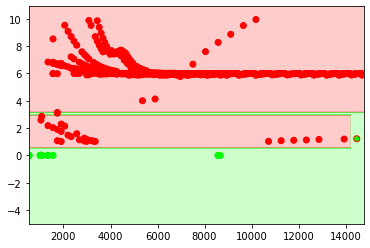

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
metric(model, X_test, y_test)

y_pred = model.predict(X_train)
plt.contourf(xx, yy, zz.reshape(xx.shape), cmap=ListedColormap(color), alpha=0.2)
plt.scatter( X_train.iloc[:,0],  X_train.iloc[:,1],c=color[y_train], edgecolors=color[y_pred])

In [69]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.3
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

In [70]:
print(metrics.confusion_matrix(y_test, custom_predict))

[[244   0]
 [ 10   0]]
